Import all the stock data for analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# create a reading list
read_list=['XOM','BP','RDS-B','CVX','VLO','MPC','LYB','SLB','HAL',"TOT"]
filepath="C:\\Users\\mohua\\OneDrive\Documents\\capstone3\\dataset\\"
outfile='stocks and crude oil closing price'
outfile1='stocks and crude oil volume'
crude_oil='crude.csv'
time_period=60

df=pd.DataFrame()
reading_number=len(read_list)

In [3]:
for i in range(reading_number):
    filename=read_list[i]+'.csv'
    company=pd.read_csv(filepath+filename)
    company1=company.set_index('time')
    print(company1.head())
    df= pd.concat([company1, df], axis=1)

            XOM close price    XOM volume
time                                     
2018-10-29        69.468680  1.158578e+06
2018-10-30        70.060914  1.232445e+06
2018-10-31        71.439926  1.043798e+06
2018-11-01        71.627437  9.715556e+05
2018-11-02        72.938021  1.156343e+06
            BP close price    BP volume
time                                   
2018-10-29       36.319744  434737.8750
2018-10-30       37.053546  583109.6250
2018-10-31       38.132816  783094.4000
2018-11-01       37.407743  531188.4375
2018-11-02       36.912928  550779.1250
            RDS-B close price   RDS-B volume
time                                        
2018-10-29          57.704613  189620.083333
2018-10-30          57.871401  182841.818182
2018-10-31          59.422532  222808.230769
2018-11-01          58.762556  114269.600000
2018-11-02          58.501245  136681.285714
            CVX close price     CVX volume
time                                      
2018-10-29       100.8867

In [4]:
print(df.info())
print(df.index)
df.index=pd.to_datetime(df.index)
print(df.index)

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 2018-10-29 to 2020-10-16
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TOT close price    496 non-null    float64
 1   TOT volume         496 non-null    float64
 2   HAL close price    496 non-null    float64
 3   HAL volume         496 non-null    float64
 4   SLB close price    496 non-null    float64
 5   SLB volume         496 non-null    float64
 6   LYB close price    496 non-null    float64
 7   LYB volume         496 non-null    float64
 8   MPC close price    496 non-null    float64
 9   MPC volume         496 non-null    float64
 10  VLO close price    496 non-null    float64
 11  VLO volume         496 non-null    float64
 12  CVX close price    496 non-null    float64
 13  CVX volume         496 non-null    float64
 14  RDS-B close price  496 non-null    float64
 15  RDS-B volume       496 non-null    float64
 16  BP close price 

In [5]:
df.head(10)

,TOT close price,TOT volume,HAL close price,HAL volume,SLB close price,SLB volume,LYB close price,LYB volume,MPC close price,MPC volume,VLO close price,VLO volume,CVX close price,CVX volume,RDS-B close price,RDS-B volume,BP close price,BP volume,XOM close price,XOM volume
time,,,,,,,,,,,,,,,,,,,,
2018-10-29,51.395438,167859.400000,32.929318,858773.666667,47.561732,7.759301e+05,68.559294,332694.888889,62.677579,570123.700000,79.732651,497017.200000,100.886771,631369.363636,57.704613,189620.083333,36.319744,434737.875000,69.468680,1.158578e+06
2018-10-30,51.376274,187588.636364,32.977467,844382.454545,47.136727,1.001686e+06,67.512971,424530.454545,62.412461,578980.900000,81.268249,442290.545455,100.499663,496079.500000,57.871401,182841.818182,37.053546,583109.625000,70.060914,1.232445e+06
2018-10-31,52.131290,165921.181818,32.974619,883608.800000,47.256300,1.044408e+06,68.609925,448181.333333,64.909842,783730.181818,83.295441,445198.909091,102.201891,408153.230769,59.422532,222808.230769,38.132816,783094.400000,71.439926,1.043798e+06
2018-11-01,51.500114,161737.500000,32.773051,990927.900000,46.934199,8.511324e+05,70.517976,313184.100000,64.324977,675464.545455,83.482873,358218.000000,101.907631,778326.333333,58.762556,114269.600000,37.407743,531188.437500,71.627437,9.715556e+05
2018-11-02,51.252152,144984.545455,32.988843,598725.583333,46.871015,5.801072e+05,71.308243,399021.888889,64.331929,528203.700000,83.612494,320045.100000,104.677275,737584.666667,58.501245,136681.285714,36.912928,550779.125000,72.938021,1.156343e+06
2018-11-05,52.030076,92364.100000,33.736162,672705.500000,47.235241,5.542048e+05,71.526768,164347.900000,63.853283,370547.833333,82.411214,316003.777778,108.333568,593749.692308,58.913010,124123.833333,37.156164,405336.687500,73.360251,8.701657e+05
2018-11-06,51.866858,87093.100000,33.903153,693150.666667,47.351119,4.955036e+05,72.541395,218487.500000,62.933309,535019.500000,82.547015,261116.222222,108.411423,380211.545455,58.890224,185947.076923,37.322870,433444.928571,73.192736,7.269573e+05
2018-11-07,52.784200,78751.666667,34.206863,769004.900000,47.715143,7.699622e+05,73.401109,407862.250000,63.181659,679266.400000,83.140038,364127.111111,109.881634,377760.000000,59.713902,124069.076923,37.831606,461377.562500,74.016694,8.688416e+05
2018-11-08,51.888304,145028.111111,33.771208,629073.181818,47.322416,1.004487e+06,73.741961,402128.111111,62.565236,766803.125000,81.448319,443388.916667,109.917420,767874.454545,58.910639,115162.000000,37.109787,474558.875000,73.792714,1.037183e+06


In [6]:
print("The stock time is from ",df.index.min(),' to ',df.index.max())

The stock time is from  2018-10-29 00:00:00  to  2020-10-16 00:00:00


In [7]:
# import crdue oil data
df_crude=pd.read_csv(filepath+crude_oil)
df_crude=df_crude.set_index('time')
df_crude.head()

,crude oil close,crude oil volume
time,,
2018-10-22,69.169998,513770.0
2018-10-23,66.430000,853265.0
2018-10-24,66.820000,775963.0
2018-10-25,67.330002,573096.0
2018-10-26,67.589996,595211.0


In [8]:
df_crude.index=pd.to_datetime(df_crude.index)
df_crude.index

DatetimeIndex(['2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25',
               '2018-10-26', '2018-10-28', '2018-10-29', '2018-10-30',
               '2018-10-31', '2018-11-01',
               ...
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-11', '2020-10-12', '2020-10-13',
               '2020-10-14', '2020-10-15'],
              dtype='datetime64[ns]', name='time', length=603, freq=None)

In [9]:
# merge crude with stock
df=pd.concat([df,df_crude],axis=1)
df.head(20)

,TOT close price,TOT volume,HAL close price,HAL volume,SLB close price,SLB volume,LYB close price,LYB volume,MPC close price,MPC volume,...,CVX close price,CVX volume,RDS-B close price,RDS-B volume,BP close price,BP volume,XOM close price,XOM volume,crude oil close,crude oil volume
time,,,,,,,,,,,,,,,,,,,,,
2018-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.169998,513770.0
2018-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.430000,853265.0
2018-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.820000,775963.0
2018-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.330002,573096.0
2018-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.589996,595211.0
2018-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-29,51.395438,167859.400000,32.929318,8.587737e+05,47.561732,7.759301e+05,68.559294,332694.888889,62.677579,570123.700000,...,100.886771,631369.363636,57.704613,189620.083333,36.319744,434737.875000,69.468680,1.158578e+06,67.040001,477487.0
2018-10-30,51.376274,187588.636364,32.977467,8.443825e+05,47.136727,1.001686e+06,67.512971,424530.454545,62.412461,578980.900000,...,100.499663,496079.500000,57.871401,182841.818182,37.053546,583109.625000,70.060914,1.232445e+06,66.180000,680441.0
2018-10-31,52.131290,165921.181818,32.974619,8.836088e+05,47.256300,1.044408e+06,68.609925,448181.333333,64.909842,783730.181818,...,102.201891,408153.230769,59.422532,222808.230769,38.132816,783094.400000,71.439926,1.043798e+06,65.309998,666487.0


In [10]:
df1=df.dropna()
df1.shape

(490, 22)

In [11]:
# create a drop_volume_list
drop_volume=[]
for i in range (reading_number):
    drop_volume.append(read_list[i]+str(' volume'))
#    print(drop_volume)

In [12]:
df_price=df1.drop(columns=drop_volume)
df_price=df_price.drop(columns="crude oil volume")
print(df_price.head())
print(df_price.info())

            TOT close price  HAL close price  SLB close price  \
time                                                            
2018-10-29        51.395438        32.929318        47.561732   
2018-10-30        51.376274        32.977467        47.136727   
2018-10-31        52.131290        32.974619        47.256300   
2018-11-01        51.500114        32.773051        46.934199   
2018-11-02        51.252152        32.988843        46.871015   

            LYB close price  MPC close price  VLO close price  \
time                                                            
2018-10-29        68.559294        62.677579        79.732651   
2018-10-30        67.512971        62.412461        81.268249   
2018-10-31        68.609925        64.909842        83.295441   
2018-11-01        70.517976        64.324977        83.482873   
2018-11-02        71.308243        64.331929        83.612494   

            CVX close price  RDS-B close price  BP close price  \
time                  

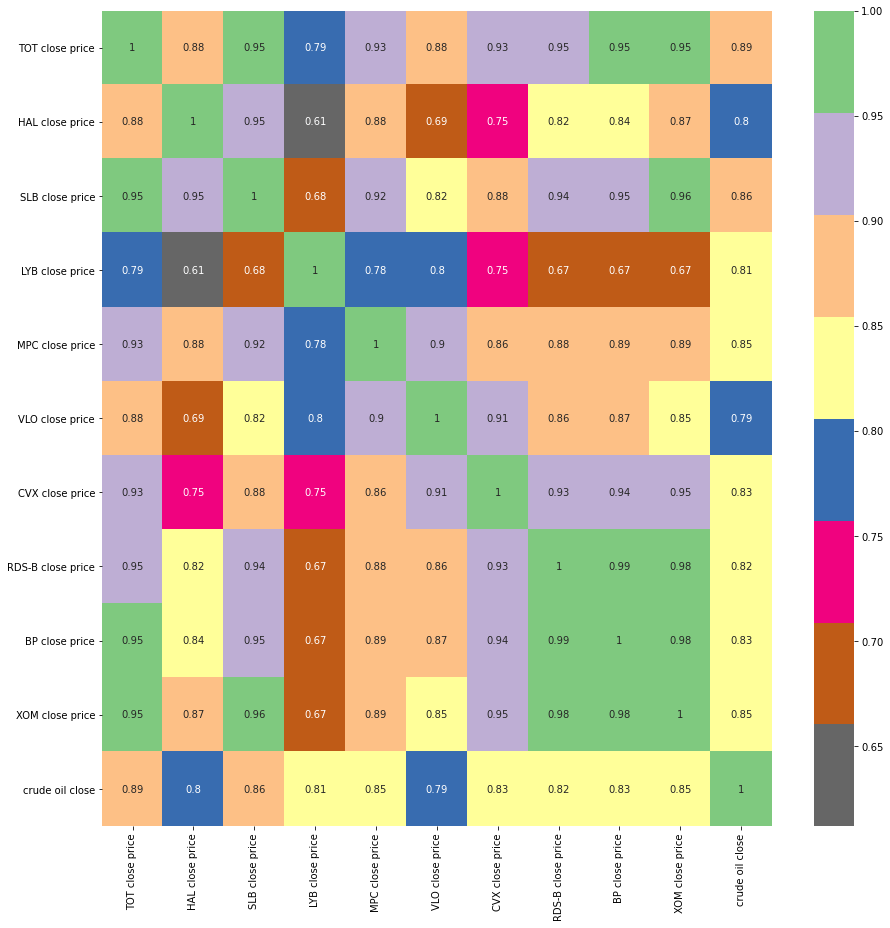

In [13]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
sns.heatmap(df_price.corr(),cmap='Accent_r',annot=True,ax=ax)

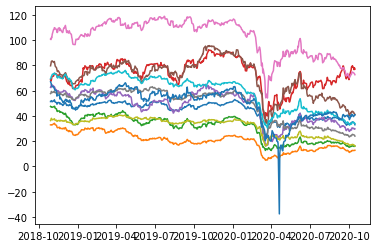

In [14]:
# setup a time series plot

plt.plot(df_price.index,df_price)
plt.show()

There are  10  stocks to compare with crude oil
The realtion ship between  XOM and crude oil is shown below


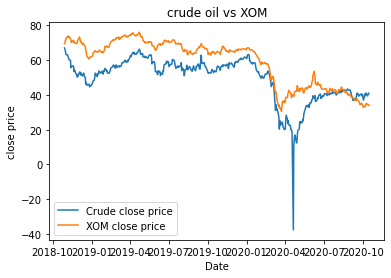

The realtion ship between  BP and crude oil is shown below


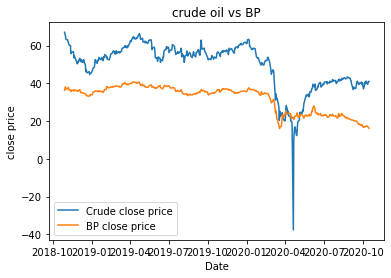

The realtion ship between  RDS-B and crude oil is shown below


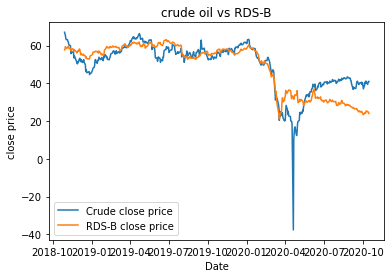

The realtion ship between  CVX and crude oil is shown below


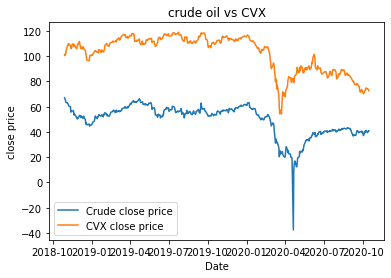

The realtion ship between  VLO and crude oil is shown below


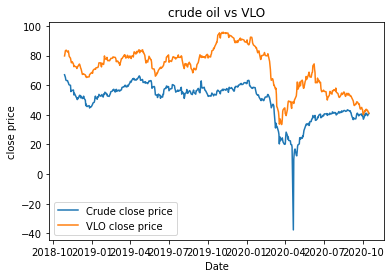

The realtion ship between  MPC and crude oil is shown below


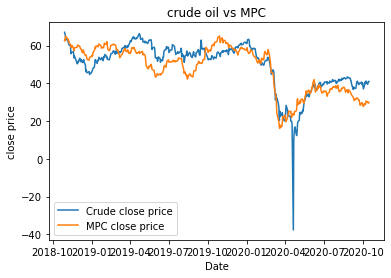

The realtion ship between  LYB and crude oil is shown below


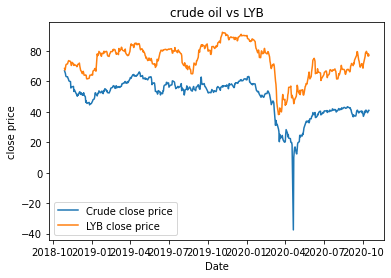

The realtion ship between  SLB and crude oil is shown below


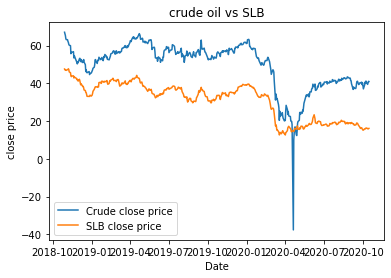

The realtion ship between  HAL and crude oil is shown below


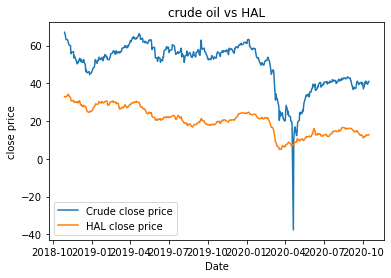

The realtion ship between  TOT and crude oil is shown below


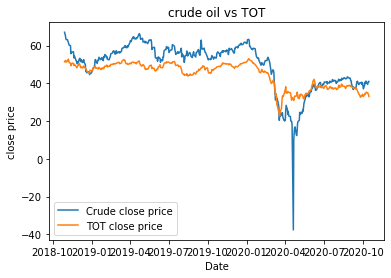

In [15]:
# plot individual chemical plant vers. crude oil price
range_data=len(read_list)
print("There are ",range_data, " stocks to compare with crude oil")
for i in range(range_data):
    print("The realtion ship between ",read_list[i],'and', 'crude oil is shown below')
    plt.plot(df_price.index,df_price['crude oil close'],label='Crude close price')
    plt.plot(df_price.index,df_price[read_list[i]+' close price'],label=read_list[i]+' close price')
    plt.xlabel('Date')
    plt.ylabel('close price')
    plt.title('crude oil vs '+read_list[i])
    plt.legend()
    plt.show()



In [16]:
df_price.to_csv(filepath+outfile+'.csv')

In [17]:
# create drop price list

drop_price=[]
for i in range (reading_number):
    drop_price.append(read_list[i]+str(' close price'))
#    print(drop_price)

df_volume1=df1.drop(columns=drop_price)
df_volume=df_volume1.drop(columns="crude oil close")

print(df_volume.head())
print(df_volume.info())

               TOT volume     HAL volume    SLB volume     LYB volume  \
time                                                                    
2018-10-29  167859.400000  858773.666667  7.759301e+05  332694.888889   
2018-10-30  187588.636364  844382.454545  1.001686e+06  424530.454545   
2018-10-31  165921.181818  883608.800000  1.044408e+06  448181.333333   
2018-11-01  161737.500000  990927.900000  8.511324e+05  313184.100000   
2018-11-02  144984.545455  598725.583333  5.801072e+05  399021.888889   

               MPC volume     VLO volume     CVX volume   RDS-B volume  \
time                                                                     
2018-10-29  570123.700000  497017.200000  631369.363636  189620.083333   
2018-10-30  578980.900000  442290.545455  496079.500000  182841.818182   
2018-10-31  783730.181818  445198.909091  408153.230769  222808.230769   
2018-11-01  675464.545455  358218.000000  778326.333333  114269.600000   
2018-11-02  528203.700000  320045.100000  73

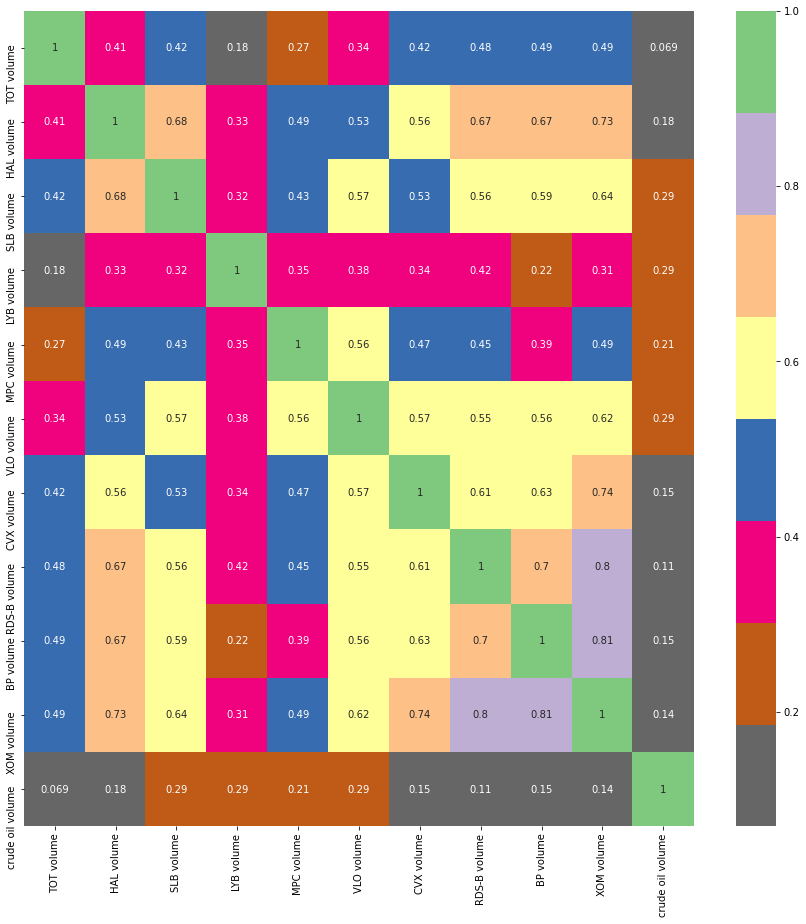

In [18]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
sns.heatmap(df_volume.corr(),cmap='Accent_r',annot=True,ax=ax)

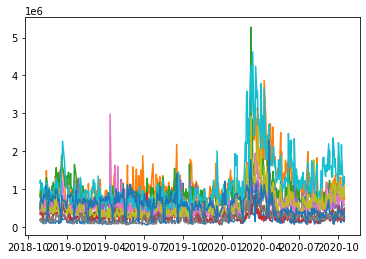

In [19]:
# setup a time series plot

plt.plot(df_volume.index,df_volume)
plt.show()

There are  10  stocks to compare with crude oil
The realtion ship between  XOM and crude oil is shown below


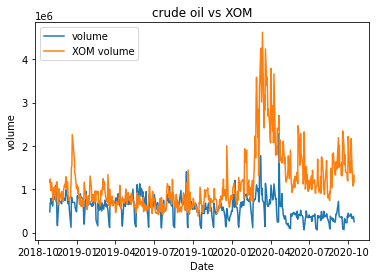

The realtion ship between  BP and crude oil is shown below


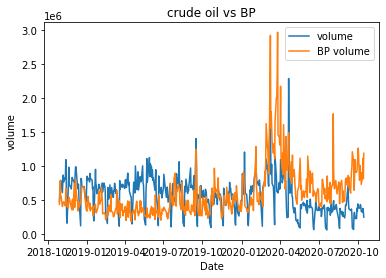

The realtion ship between  RDS-B and crude oil is shown below


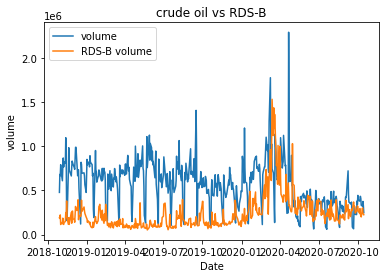

The realtion ship between  CVX and crude oil is shown below


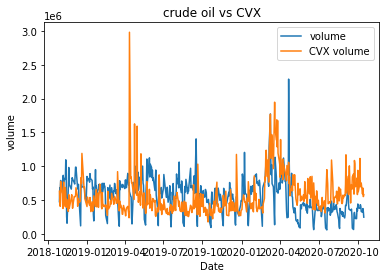

The realtion ship between  VLO and crude oil is shown below


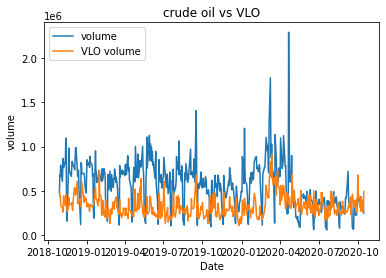

The realtion ship between  MPC and crude oil is shown below


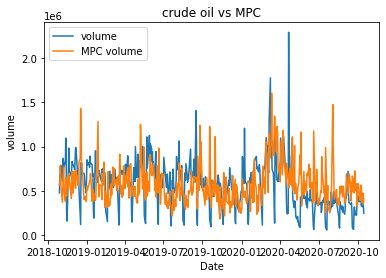

The realtion ship between  LYB and crude oil is shown below


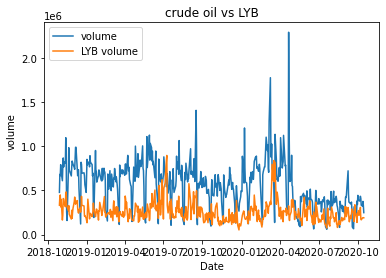

The realtion ship between  SLB and crude oil is shown below


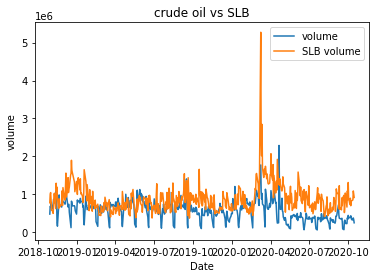

The realtion ship between  HAL and crude oil is shown below


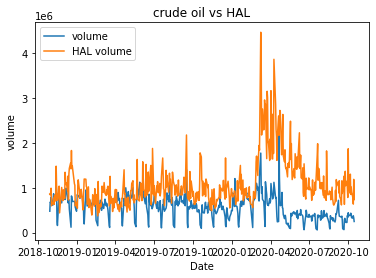

The realtion ship between  TOT and crude oil is shown below


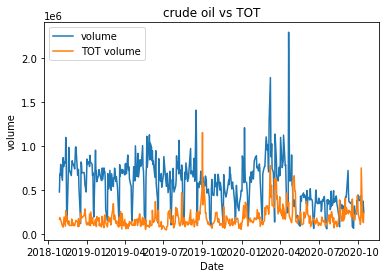

In [20]:
# plot individual chemical plant vers. crude oil volume
range_data=len(read_list)
print("There are ",range_data, " stocks to compare with crude oil")
for i in range(range_data):
    print("The realtion ship between ",read_list[i],'and', 'crude oil is shown below')
    plt.plot(df_volume.index,df_volume['crude oil volume'],label='volume')
    plt.plot(df_volume.index,df_volume[read_list[i]+' volume'],label=read_list[i]+' volume')
    plt.xlabel('Date')
    plt.ylabel('volume')
    plt.title('crude oil vs '+read_list[i])
    plt.legend()
    plt.show()

There are  10  stocks to compare with crude oil
The realtion ship between  XOM and crude oil is shown below


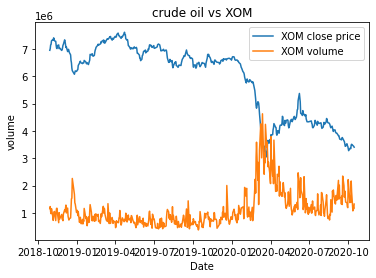

The realtion ship between  BP and crude oil is shown below


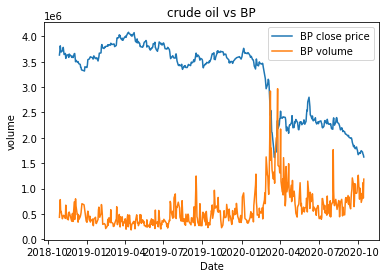

The realtion ship between  RDS-B and crude oil is shown below


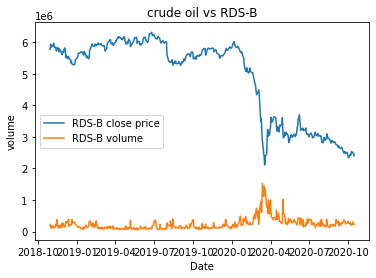

The realtion ship between  CVX and crude oil is shown below


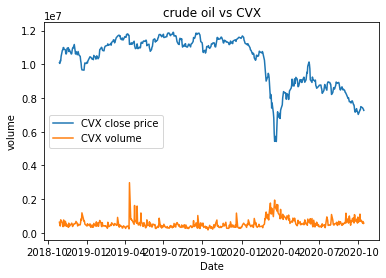

The realtion ship between  VLO and crude oil is shown below


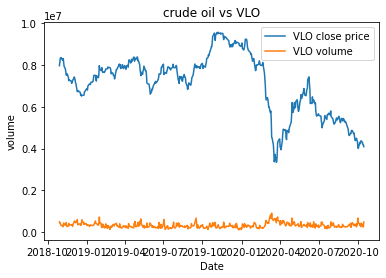

The realtion ship between  MPC and crude oil is shown below


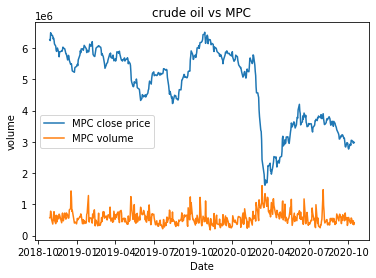

The realtion ship between  LYB and crude oil is shown below


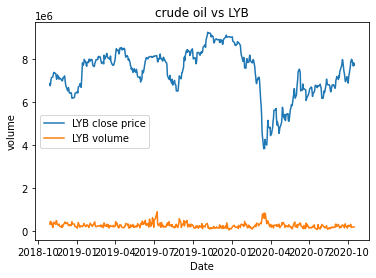

The realtion ship between  SLB and crude oil is shown below


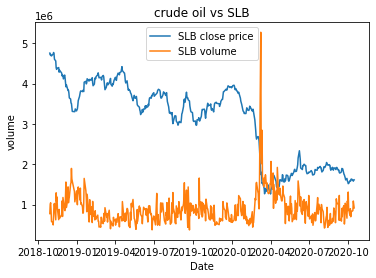

The realtion ship between  HAL and crude oil is shown below


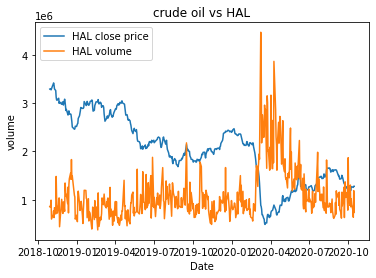

The realtion ship between  TOT and crude oil is shown below


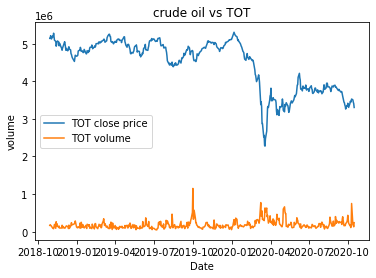

In [21]:
# compare with stock price vs volume
range_data=len(read_list)
print("There are ",range_data, " stocks to compare with crude oil")
for i in range(range_data):
    print("The realtion ship between ",read_list[i],'and', 'crude oil is shown below')
    plt.plot(df_price.index,100000*df_price[read_list[i]+' close price'],label=read_list[i]+' close price')
    plt.plot(df_volume.index,df_volume[read_list[i]+' volume'],label=read_list[i]+' volume')
    plt.xlabel('Date')
    plt.ylabel('volume')
    plt.title('crude oil vs '+read_list[i])
    plt.legend()
    plt.show()

In [22]:
df_volume.to_csv(filepath+outfile1+'.csv')